<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1: Síntesis de Señales
#### Mora Taranilla

# Introducción
Una señal digital es una representación de datos en forma de secuencia de valores discretos. A continuación serán definidos algunos conceptos clave para comprender lo realizado a lo largo de este trabajo práctico. Ya que trabajamos con secuencias de valores discretos, no continuos, se realiza un proceso de *sampling* o también conocido como muestreo. En este proceso se toman muestras de la señal original cada cierto tiempo; si es fijo, se lo llama *tiempo de muestreo (Ts)*, y se guardan los valores dentro de un vector. La cantidad de muestras puede ser infinita o finita, en este caso trabajamos con una cantidad finita y la llamamos *N*. 

Al hablar de señales digitales, es más sencillo trabajar con la *frecuencia de muestreo (fs)*, la cual se define de la siguiente manera:
\begin{equation}
fs = \frac{1}{Ts}
\end{equation}
Las unidades de *fs* utilizadas en este trabajo son Hz, que equivalen a 1/s.

### Energía y potencia promedio
Una de las características más relevantes a analizar de una señal es la energía, la cual se define a partir de la siguiente fórmula, si es que se trata de una señal continua:

\begin{equation}
Ex = \int _{-\infty}^{\infty} |x(t)|^{2}\ dt
\end{equation}

Las unidades de energía se dan en joules (J). Es importante tener en cuenta que, al definirse a través de una integral impropia, la misma puede divergir, es decir, que la señal tenga energía infinita. Como en este caso trabajamos con secuencias de valores discretas, la fórmula a utilizar para medir la energía es:

\begin{equation}
Ex = \sum_{n = -\infty}^{\infty} |x[n]|^{2}\
\end{equation}

Otra característica a tener en cuenta es la potencia promedio. La misma se define en señales discretas por:

\begin{equation}
Px = \lim_{N \to \infty} \frac{1}{2N+1} \sum_{n=-T}^{T} |x[n]|^{2}\
\end{equation}

Si x[n] es una señal periódica de periodo T, entonces se puede utilizar 

\begin{equation}
Px =  \frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^{2}\ 
\end{equation}

La unidad de la potencia se da en watts (W).

Los dos conceptos mencionados anteriormente generan una clasificación dentro de las señales:
- Si Ex es finita, entonces la señal se define como una señal de energía, y Px=0.
- Si Px es finita y distinta de cero, entonces se dice que la señal x[n] es una señal de potencia. En este caso, Ex es infinita.
Es de suma importancia aclarar que una señal no puede ser de energía y potencia a la vez; puede ser una de ellas o ninguna. 

### Correlación
La correlación se utiliza para medir la similitud entre dos señales. Se calcula en el caso de las señales discretas finitas a partir de la siguiente fórmula, siendo x[n] e y[n] las señales, y N la cantidad de muestras de cada señal:

\begin{equation}
r_{xy}[m] = \sum_{n=0}^{N-1} x[n] \cdot y[n+m]
\end{equation}

El resultado es un nuevo vector, al que para cada retraso m se le asigna un valor de correlación. Este valor puede ser alto o bajo, y dependiendo de ello, se encuentra una similitud mayor o menor entre las señales para ese retraso m.
Una autocorrelación sigue la misma definición, pero es una señal correlacionada consigo misma.

### Ortogonalidad
El concepto de ortogonalidad en señales discretas se define de la misma forma que la ortogonalidad entre vectores. Dos vectores son ortogonales cuando su producto interno es igual a 0. Para ello es necesario que ambos vectores (o señales) pertenezcan al mismo espacio vectorial, es decir, la misma cantidad de muestras. Por lo tanto, para verificar la ortogonalidad, se requiere calcular el producto interno entre las señales de N muestras:

\begin{equation}
Producto Interno = \sum_{n = 0}^{N-1} x[n] \cdot y[n]
\end{equation}

# Análisis y desarrollo del trabajo
### Funciones y librerías
Para llevar a cabo el trabajo, utilicé las siguientes librerías de Python:
- NumPy: Para trabajar con vectores y algunas operaciones sobre los mismos.
- Matplotlib: Para realizar los gráficos.
- SciPy: Para una función de correlación.

Además de utilizar funciones existentes, realicé funciones propias para generar las señales sinusoidales y cuadradas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sign

def mi_funcion_sen( ax = 1, dc = 0, fx = 1, ph = 0, nn = 1000, fs = 1000):
    Ts = 1/fs #tiempo de muestreo
    T_simulacion = nn * Ts # segundos
    
    tt = np.arange(start=0, stop=T_simulacion, step = Ts) #grilla temporal
    xx = ax * np.sin( 2 * np.pi * fx * tt + ph ) + dc
    
    return tt, xx

def mi_funcion_cuadrada ( ax = 1, dc = 0, fx = 1, ph = 0, nn = 1000, fs = 1000):
    Ts = 1/fs #tiempo de muestreo
    T_simulacion = nn * Ts # segundos
    
    tc = np.arange(start=0, stop=T_simulacion, step = Ts) #grilla temporal
    xc = ax * np.sign(np.sin( 2 * np.pi * fx * tt + ph ) + dc) #utilizo la funcion sign, que me devuelve -1 para valores negativos, 1 para positivos y 0 para 0.
    
    return tc, xc

Dentro de los parámetros de las funciones encontramos los siguientes componentes:
- ax: Amplitud de la señal.
- dc: Hace referencia al valor medio, implica un desplazamiento sobre el eje de la amplitud.
- fx: Frecuencia de la señal.
- ph: Fase de la señal.
- nn: Cantidad de muestras.
- fs: Frecuencia de muestreo.
Ambas funciones dan como resultado dos vectores, de la misma longitud; tt contiene los datos de tiempo (tt[k]=t(kTs)), mientras que xx contiene el valor de la señal (xx[k]=xx[t(kTs)]).

## Síntesis y gráficos de señales
Para este primer punto, debíamos sintetizar y graficar las siguientes señales:
- Una señal sinusoidal de 2 kHz.
- Misma señal amplificada y desfazada en π/2.
- Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
- Señal anterior recortada al 75% de su amplitud.
- Una señal cuadrada de 4 kHz.
- Un pulso rectangular de 10 ms.

En todos los casos utilicé una misma *fs = 40 kHz* (por lo tanto, una *Ts = 0,000025 s*) y misma cantidad de muestras *N = 1000*. De esta manera, todas las simulaciones tienen el mismo tiempo de simulación de *0,025 segundos*, y el vector *tt* va a ser igual para cada caso.

In [2]:
fs = 40000
Ts = 1/fs
N = 1000
T_simulacion = N/fs

### Sinusoidal de 2 kHz
En este caso tome la decisión de que la amplitud sea de 1. Una sinusoidal con esta frecuencia implica un periodo de *0,0005 s*.

La potencia de la señal sinusoidal de 2KHz es de 0.5 W


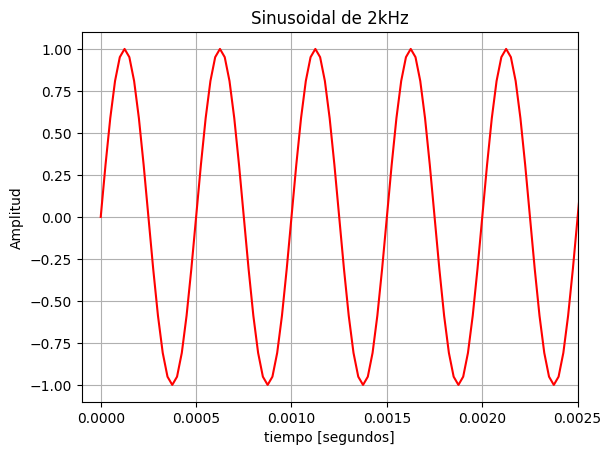

In [3]:
tt, x1 = mi_funcion_sen(fx = 2000, nn = N, fs = fs)
potx1 = np.mean(x1**2)

print(f'La potencia de la señal sinusoidal de 2KHz es de {potx1} W')

plt.figure(1)
plt.plot(tt, x1, color='red')
plt.title('Sinusoidal de 2kHz')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud')
plt.xlim((-0.0001,0.0025))
plt.show()

### Misma señal amplificada y desfazada en π/2
Para este caso aumente la amplitud anterior en un factor de 2. Al desfazarla en π/2, lo que obtenemos es un coseno con la misma frecuencia.

La potencia para la sinusoidal de 2KHz, amplitud 2 y fase π/2 es de 1.9999999999999996 W


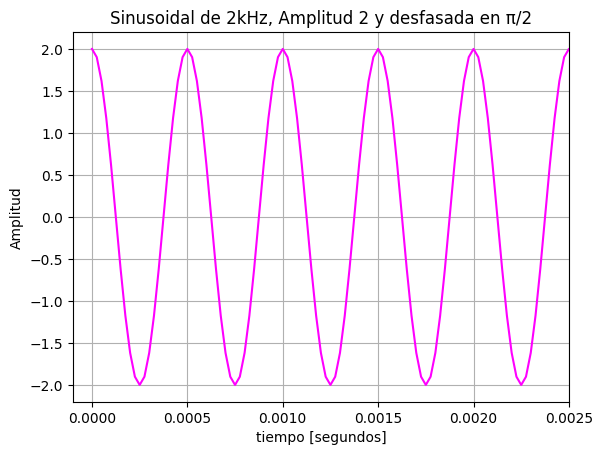

In [4]:
tt, x2 = mi_funcion_sen(ax=2, fx = 2000, ph = np.pi/2, nn = N, fs = fs)
potx2 = np.mean(x2**2)

print(f'La potencia para la sinusoidal de 2KHz, amplitud 2 y fase π/2 es de {potx2} W')

plt.figure(2)
plt.plot(tt, x2, color='magenta')
plt.title('Sinusoidal de 2kHz, Amplitud 2 y desfasada en π/2')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud')
plt.xlim((-0.0001,0.0025))
plt.show()

En el gráfico se puede observar claramente el desfasaje, ya que en el instante cero, el valor inicial es de 2. Esto es algo esperado, ya que el valor que toma un coseno en tiempo cero es 1. Al multiplicarlo por la amplitud, conseguimos el valor inicial.

### Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia
Para llevarlo a cabo, utilicé una nueva señal auxiliar con la mitad de la frecuencia que la primera (1 kHz) y la multipliqué por la señal original.

La potencia para la señal modulada es de 0.2500000000000001 W


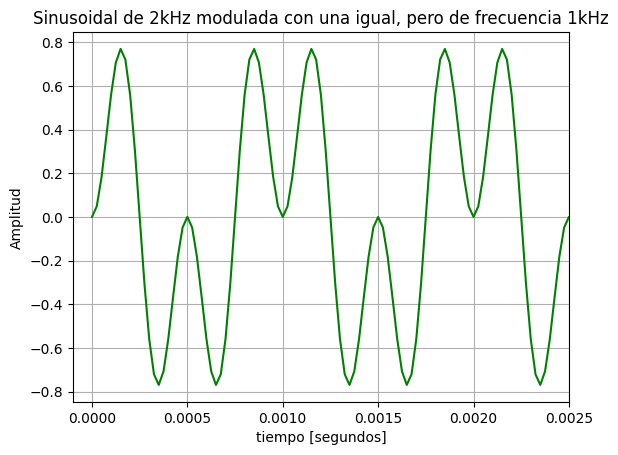

In [5]:
tt, xaux = mi_funcion_sen(fx = 1000, nn = N, fs = fs)
x3 = x1 * xaux
potx3 = np.mean(x3**2)

print(f'La potencia para la señal modulada es de {potx3} W')

plt.figure(3)
plt.plot(tt, x3, color='green')
plt.title('Sinusoidal de 2kHz modulada con una igual, pero de frecuencia 1kHz')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud')
plt.xlim((-0.0001,0.0025))
plt.show()

### Señal anterior recortada al 75% de su amplitud
Al haber utilizado una amplitud de 1 originalmente, en este caso se recortó a 0.75. Para llevarlo a cabo utilicé una función de NumPy (clip).

La potencia para la señal clippeada es de 0.3694466011250106 W


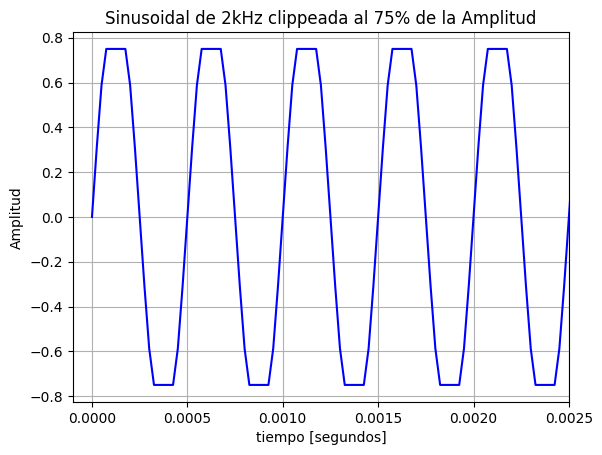

In [6]:
a4 = 1*0.75 #reduzco la amplitud en un 75%
x4 = np.clip(x1, -a4, a4)
potx4 = np.mean(x4**2)

print(f'La potencia para la señal clippeada es de {potx4} W')

plt.figure(4)
plt.plot(tt, x4, color='blue')
plt.title('Sinusoidal de 2kHz clippeada al 75% de la Amplitud')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud')
plt.xlim((-0.0001,0.0025))
plt.show()

### Una señal cuadrada de 4 kHz
Una señal cuadrada es una señal periódica que varía entre tres valores: -1, 0 y 1. En este caso desarrollé una función propia que utiliza como base una sinusoidal y me devuelve el signo de la misma.

La potencia para la señal cuadrada de 4KHz es de 0.999 W


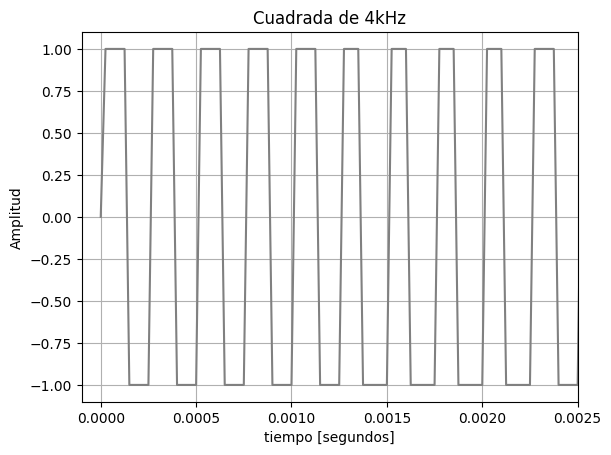

In [7]:
tc, x5 = mi_funcion_cuadrada (fx = 4000, nn = N, fs = fs)
potx5 = np.mean(x5**2)

print(f'La potencia para la señal cuadrada de 4KHz es de {potx5} W')

plt.figure(5)
plt.plot(tt, x5, color='grey')
plt.title('Cuadrada de 4kHz')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud')
plt.xlim((-0.0001,0.0025))
plt.show()

### Un pulso rectangular de 10 ms
Este es el único caso donde no trabajamos con una señal periódica, por lo tanto, se realizó el cálculo de la energía.

La energia para el pulso rectangular es de 400.0 J


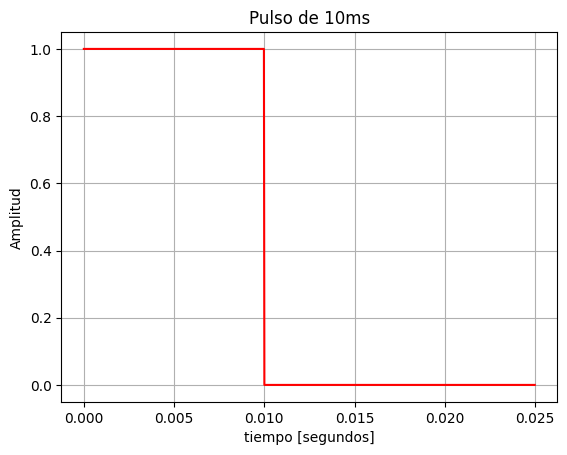

In [8]:
tp=np.arange(0,T_simulacion,Ts)
x6=np.zeros(1000)
x6[0:400]=1

def energia (xx):
    E=0
    long = len(xx)
    for k in range(long):
        E = E + (xx[k])**2
    return E
enx6 = energia(x6)

print(f'La energia para el pulso rectangular es de {enx6} J')

plt.figure(6)
plt.plot(tt, x6, color='red')
plt.title('Pulso de 10ms')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud')
plt.show()

## Ortogonalidad entre Señales
Para este ítem, fue solicitada la verificación de ortogonalidad entre la primera señal y las demás. Para llevarlo a cabo, utilicé una función de NumPy (np.dot), la cual calcula el producto interno entre dos vectores.

In [9]:
prodx1x2 = np.dot(x1,x2)
prodx1x3 = np.dot(x1,x3)
prodx1x4 = np.dot(x1,x4)
prodx1x5 = np.dot(x1,x5)
prodx1x6 = np.dot(x1,x6)

print(f'El producto interno entre la primera y segunda señal es {prodx1x2}')
print(f'El producto interno entre la primera y tercera señal es {prodx1x3}')
print(f'El producto interno entre la primera y cuarta señal es {prodx1x4}')
print(f'El producto interno entre la primera y quinta señal es {prodx1x5}')
print(f'El producto interno entre la primera y sexta señal es {prodx1x6}')

El producto interno entre la primera y segunda señal es 3.788858116138272e-12
El producto interno entre la primera y tercera señal es -1.0835082830951137e-14
El producto interno entre la primera y cuarta señal es 427.2076277255258
El producto interno entre la primera y quinta señal es -8.000000000000211
El producto interno entre la primera y sexta señal es 6.772576801292105e-14


En base a los resultados obtenidos, es importante analizar y estudiar el comportamiento de las señales digitales. Tal como fue mencionado anteriormente, dos vectores son ortogonales si y solo si su producto interno es cero. En este caso, podemos observar que ninguno de los resultados dio cero. ¿Esto implica que no hay ortogonalidad en ningún caso? No necesariamente. 

Algunos de los resultados son realmente muy pequeños, como en el caso de la segunda y sexta señal, y si analizamos las señales que estamos comparando, deberían ser ortogonales; ¿a qué se debe entonces el hecho de que ninguna sea cero? Esto ocurre ya que los valores dentro de nuestros vectores, al ser números de máquina, no representan idénticamente los valores reales de la señal, sino que se produce un redondeo o truncamiento de los mismos. Estos redondeos y truncamientos adjudican un error a nuestras cuentas, obteniendo así resultados cercanos a cero, pero no cero.

Es por ello que, en este caso, al tener números de orden menor o similar a 10^-12 y al deducir analógicamente la ortogonalidad, sí podemos decir que se verifica la ortogonalidad igualmente entre las señales de manera digital. En base a esto, si pedimos un recorte de decimales a los 10 dígitos, obtenemos lo siguiente:

In [10]:
print(f'El producto interno entre la primera y segunda señal es {prodx1x2:.10f}')
print(f'El producto interno entre la primera y tercera señal es {prodx1x3:.10f}')
print(f'El producto interno entre la primera y cuarta señal es {prodx1x4:.10f}')
print(f'El producto interno entre la primera y quinta señal es {prodx1x5:.10f}')
print(f'El producto interno entre la primera y sexta señal es {prodx1x6:.10f}')

El producto interno entre la primera y segunda señal es 0.0000000000
El producto interno entre la primera y tercera señal es -0.0000000000
El producto interno entre la primera y cuarta señal es 427.2076277255
El producto interno entre la primera y quinta señal es -8.0000000000
El producto interno entre la primera y sexta señal es 0.0000000000


De esta manera, podemos decir que se verifica la ortogonalidad entre la primera y segunda señal. Por otro lado, de la tercera, cuarta y quinta, diremos que no son ortogonales con la sinusoidal de 2 kHz, ya que los valores de producto interno son distintos de cero. 

## Correlaciones
La correlación es una herramienta que permite analizar la similitud entre dos señales. En este apartado, fue solicitado graficar la autocorrelación de la primera señal y la correlación de la primera con las demás. Para llevarlo a cabo, utilicé una función de scipy.signal para calcular las correlaciones.

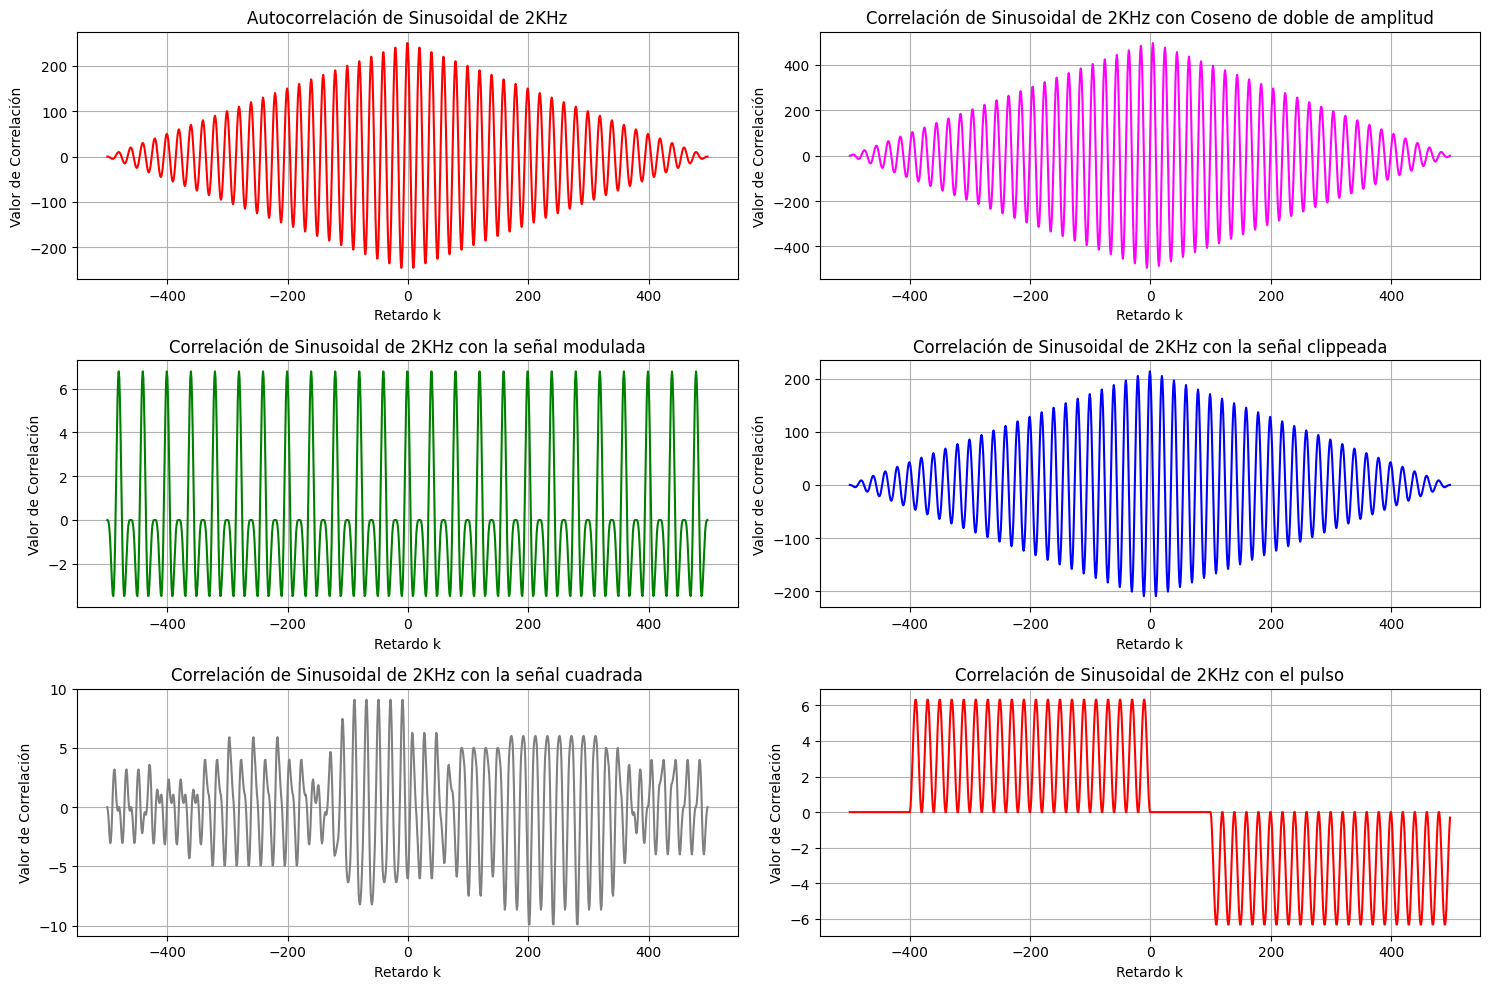

In [15]:
def correlacion (v1, v2):
    N = len(v1)
    rv1v2 = sign.correlate(v1, v2, mode ='full', method = 'fft')
    eje_rv1v2 = np.arange(-(N), N-1)
    return rv1v2, eje_rv1v2

# Defino unas nuevas señales, cortadas para visualizar mejor la convolución
nn = 500

x1_con = np.zeros(nn)
x2_con = np.zeros(nn)
x3_con = np.zeros(nn)
x4_con = np.zeros(nn)
x5_con = np.zeros(nn)
x6_con = np.zeros(nn)

x1_con = x1[0:nn]
x2_con = x2[0:nn]
x3_con = x3[0:nn]
x4_con = x4[0:nn]
x5_con = x5[0:nn]
x6_con = x6[0:nn]

rx1x1, eje_correlx1 = correlacion(x1_con,x1_con)
rx1x2, eje_correlx2 = correlacion(x1_con,x2_con)
rx1x3, eje_correlx3 = correlacion(x1_con,x3_con)
rx1x4, eje_correlx4 = correlacion(x1_con,x4_con)
rx1x5, eje_correlx5 = correlacion(x1_con,x5_con)
rx1x6, eje_correlx6 = correlacion(x1_con,x6_con)

#Grafico las correlaciones
plt.figure(7, figsize=(15, 10))
plt.subplot(3,2,1)
plt.plot(eje_correlx1, rx1x1, color='red')
plt.title('Autocorrelación de Sinusoidal de 2KHz')
plt.grid(True)
plt.xlabel('Retardo k')
plt.ylabel('Valor de Correlación')

plt.subplot(3,2,2)
plt.plot(eje_correlx2, rx1x2, color='magenta')
plt.title('Correlación de Sinusoidal de 2KHz con Coseno de doble de amplitud')
plt.grid(True)
plt.xlabel('Retardo k')
plt.ylabel('Valor de Correlación')

plt.subplot(3,2,3)
plt.plot(eje_correlx3, rx1x3, color='green')
plt.title('Correlación de Sinusoidal de 2KHz con la señal modulada')
plt.grid(True)
plt.xlabel('Retardo k')
plt.ylabel('Valor de Correlación')

plt.subplot(3,2,4)
plt.plot(eje_correlx4, rx1x4, color='blue')
plt.title('Correlación de Sinusoidal de 2KHz con la señal clippeada')
plt.grid(True)
plt.xlabel('Retardo k')
plt.ylabel('Valor de Correlación')

plt.subplot(3,2,5)
plt.plot(eje_correlx5, rx1x5, color='grey')
plt.title('Correlación de Sinusoidal de 2KHz con la señal cuadrada')
plt.grid(True)
plt.xlabel('Retardo k')
plt.ylabel('Valor de Correlación')

plt.subplot(3,2,6)
plt.plot(eje_correlx6, rx1x6, color='red')
plt.title('Correlación de Sinusoidal de 2KHz con el pulso')
plt.grid(True)
plt.xlabel('Retardo k')
plt.ylabel('Valor de Correlación')

plt.tight_layout()

plt.show()

### Análisis de resultados

#### Autocorrelación

Utilizando como base la definición de autocorrelación, se puede observar un comportamiento esperado. En primer lugar, podemos observar que en un retardo de 0 se encuentra el valor máximo. Esto se respalda teóricamente, ya que obtenemos la siguiente fórmula:

\begin{equation}
rxx[0] = \sum_{n=0}^{N-1} x[n] \cdot x[n+0] = \sum_{n=0}^{N-1} x^2[n]
\end{equation}

Por lo tanto, obtenemos una suma de números positivos. Como tratamos con una señal periódica, uno esperaría observar el máximo cada vez que el retardo sea igual a un múltiplo del periodo de la senoidal, pero esto no sucede y se debe a que la señal con la que trabajamos es finita. Podemos observar que se presenta una oscilación, y que llega a máximos locales, pero cada vez este valor disminuye. Esto ocurre ya que, a medida que el retardo aumenta, se realizan más productos que resultan cero. De manera más demostrativa, planteo el siguiente ejemplo:

\begin{equation}
rxx[-10] = \sum_{n=0}^{N-1} x[n] \cdot x[n-10] = x[0] \cdot x[-10] + x[1] \cdot x[-9] + x[2] \cdot x[-8] + ... + x[N-1] · x[N-11]
\end{equation}

Si prestamos atención a los primeros términos de la sumatoria, encontramos posiciones del vector donde se encuentran valores iguales a cero (X[-k]); por lo tanto, esos productos no aportan a la sumatoria. De esta manera, cuando llegamos a un múltiplo del periodo de la señal, obtenemos una sumatoria de valores positivos y ceros, a diferencia del retardo 0. La disminución del valor de correlación en los máximos locales se produce de manera lineal, lo que era esperado, ya que más periodos de la señal dejan de aportar a la sumatoria.

#### Correlaciones cruzadas

Es esperable, de igual manera que en la autocorrelación, que a medida que el retardo se aleja de 0, se atenúe la amplitud, ya que todas las señales son finitas. Se puede observar de manera clara este comportamiento en la segunda y cuarta correlación. Sobre la correlación con el coseno, es acertado que en el retardo 0 el valor de correlación sea cero, ya que por definición se obtiene:

\begin{equation}
rx1x2 [0] = \sum_{n=0}^{N-1} x1[n] \cdot x2[n+0]
\end{equation}

De esta manera obtenemos el producto interno entre las señales, y como ya vimos antes, el valor es cero para este caso. En todas las correlaciones, podemos ver este mismo comportamiento y observar el valor del producto interno en el retardo 0, lo que era esperado por la definición de correlación.  


## 2⋅sin(α)⋅sin(β)=cos(α−β)−cos(α+β)
### Demostración de identidad trigonométrica
Para demostrar la identidad trigonométrica, partimos del desarrollo por identidad de Euler de los senos:

\begin{equation}
sin(\alpha) = \frac{e^{i\alpha}-e^{-i\alpha}}{2i}
\end{equation} 
\begin{equation}
sin(\beta) = \frac{e^{i\beta}-e^{-i\beta}}{2i}
\end{equation} 

Reemplazo en la ecuación y obtengo:

\begin{equation}
2 \cdot sin(\alpha) \cdot sin(\beta) = 2 \cdot \frac{e^{i\alpha}-e^{-i\alpha}}{2i} \cdot \frac{e^{i\beta}-e^{-i\beta}}{2i} = -\frac{1}{2} [(e^{i\alpha}-e^{-i\alpha}) \cdot (e^{i\beta}-e^{-i\beta})]
\end{equation}

Utilizo la propiedad distributiva:

\begin{equation}
2 \cdot sin(\alpha) \cdot sin(\beta) = -\frac{1}{2} (e^{i\alpha} \cdot e^{i\beta} - e^{i\alpha} \cdot e^{-i\beta} - e^{-i\alpha} \cdot e^{i\beta} + e^{-i\alpha} \cdot e^{-i\beta}) = -\frac{1}{2} (e^{i(\alpha+\beta)} - e^{i(\alpha-\beta)} - e^{-i(\alpha-\beta)} + e^{-i(\alpha+\beta)})
\end{equation}

Desarrollo por identidad de Euler: 

\begin{equation}
e^{i\theta} = cos(\theta) + i sin(\theta)
\end{equation}
\begin{equation}
e^{-i\theta} = cos(\theta) - i sin(\theta)
\end{equation}

\begin{equation}
2 \cdot sin(\alpha) \cdot sin(\beta) = -\frac{1}{2} [cos(\alpha+\beta) + i sin(\alpha+\beta) - cos(\alpha-\beta) - i sin(\alpha-\beta) - cos(\alpha-\beta) + i sin(\alpha-\beta) + cos(\alpha+\beta) - i sin(\alpha+\beta)] = -\frac{1}{2} [2 \cdot cos(\alpha+\beta) - 2 \cdot cos(\alpha-\beta)]
\end{equation}

Simplificando y reordenando, obtengo finalmente:

\begin{equation}
2 \cdot sin(\alpha) \cdot sin(\beta) = cos(\alpha-\beta) - cos(\alpha+\beta)
\end{equation}


### ¿Se cumple para señales sinusoidales?
Para verificar que efectivamente sí se cumple la relación, utilicé *x1* y *xaux*.

In [ ]:
#Voy a utilizar las sinusoidales realizadas anteriormente: x1 y xaux, que son iguales pero una tiene frecuencia 2KHz y la otra 1KHz
xx4i = 2*xaux*x1

#Para el otro lado del igual, utilizo una sinusoidal desfasada en pi/2 para realizar los cosenos. 
tt, xx4aux1 = mi_funcion_sen(fx = 1000,ph = np.pi/2, nn = 1000, fs = fs)
tt, xx4aux2 = mi_funcion_sen(fx = 3000,ph = np.pi/2, nn = 1000, fs = fs)

xx4ii=np.zeros(1000) #Inicializo el array

for k in range(1000):
    xx4ii[k] = xx4aux1[k] - xx4aux2[k]

plt.figure(13)

plt.subplot(2,1,1) #Grafico un lado del igual
plt.plot(tt, xx4i)
plt.title('2sin(α)sin(β)')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [Volts]')

plt.subplot(2,1,2) #Grafico el otro lado del igual
plt.plot(tt, xx4ii, color='red')
plt.title('cos(α-β) - cos(α+β)')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [Volts]')

plt.tight_layout() #Para que se visualice bien ambos graficos y que no se superponga el texto

plt.show()

Se puede observar, a partir de los gráficos, que existe una relación de similitud. Sin embargo, decidí realizar un nuevo gráfico para terminar de confirmar la igualdad. Resté a ambos lados del igual el término de cosenos, obteniendo 2⋅sin(α)⋅sin(β)-(cos(α−β)−cos(α+β))=0. Grafiqué esta nueva señal.

In [ ]:
xx4 = np.zeros(1000)

for k in range(1000):
    xx4[k] = xx4i[k] - xx4ii[k]

plt.figure(14)
plt.plot(tt, xx4, color='red')
plt.title('2sin(α)sin(β)-[cos(α-β)-cos(α+β)]')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [Volts]')
plt.show()

Tal como era esperado, esta resta se asemeja a cero. Podemos ver que el resultado no es una señal constante en cero, pero sus valores son menores en módulo a 10^-14, por lo que se puede suponer que nuevamente se debe a errores al discretizar las señales y redondeos. De esta manera se puede concluir que sí se cumple la igualdad para señales sinusoidales.

# Conclusiones
En conclusión, este trabajo permite reparar sobre los conceptos y operaciones básicas de procesamiento de señales. En el primer apartado, pudimos visualizar gráficamente señales discretas, entre ellas sinusoidales, cuadradas y pulsos, mediante la manipulación de los parámetros.  

En segundo lugar, abordamos el concepto de ortogonalidad a través del producto interno. En un principio, a simple vista, no se obtuvieron los resultados esperados. Ningún producto interno tomó el valor nulo, pero de igual manera, haciendo reparo en los errores que conlleva trabajar con señales digitales, se concluyó que los valores en un rango de 10^-12 confirmaban la ortogonalidad entre señales.

En cuanto a las autocorrelaciones y correlaciones cruzadas, se observaron los resultados esperados. Se llevó a cabo un análisis de los gráficos y su relación con la definición de esta operación. 

Finalmente, en cuanto a la relación trigonométrica, concluimos que la validez de la identidad no se comprueba únicamente de manera algebraica, sino que también presenta una utilidad en cuanto a señales digitales.

# Autoevaluación
Sobre este trabajo puedo decir que logré resolverlo. En base a las correcciones, logré identificar los conflictos y pude analizar los gráficos de la correlación. Ya tenía incorporado medianamente el lenguaje de Python, por lo que no tuve conflictos por ese lado, pero puedo decir que logré solidificar los conceptos principales sobre señales y cómo los mismos afectan directamente a la representación gráfica. 

Sí utilicé Gemini, principalmente para consultar cuáles funciones de NumPy y SciPy podía utilizar. Fuera de ello, intenté realizar las cosas por mi cuenta. 